In [1]:
import pandas as pd
data = pd.read_csv('wine.csv')
data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
from sklearn.datasets import load_wine

wine= load_wine()

wine.keys()

x = wine['data']
y = wine['target']

print(x.shape)
print(y.shape)

(178, 13)
(178,)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train, y_train)


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [7]:
import pandas as pd 

df = pd.DataFrame(x,
                  columns=wine['feature_names'])

df['target'] = y
df.sample()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
58,13.72,1.43,2.5,16.7,108.0,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285.0,0


In [8]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
from sklearn.metrics import accuracy_score, \
confusion_matrix, \
classification_report

cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  1,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

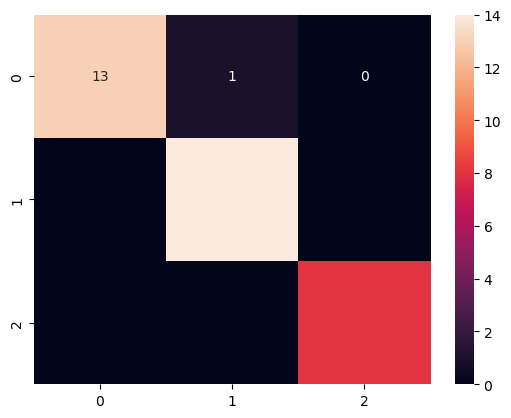

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,annot= True)
plt.show()

In [11]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9722222222222222

In [12]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

